In [27]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [28]:
y = x > 0
y, y.dtype

(array([False,  True,  True]), dtype('bool'))

In [29]:
y = y.astype(np.int32)
y

array([0, 1, 1], dtype=int32)

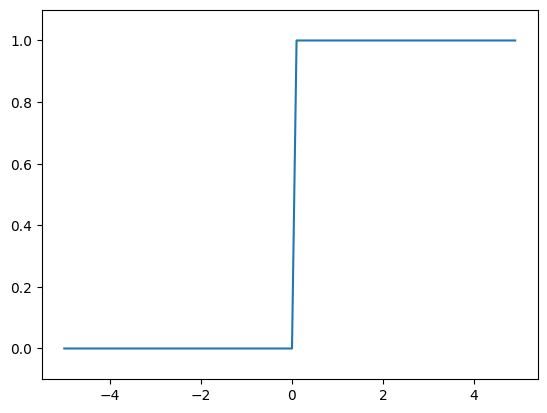

In [30]:
import numpy as np
import matplotlib.pylab as plt # pylab和pyplot类似，但是包含numpy的功能

def step_function(x: np.array):
    return (x > 0).astype(np.int32)

x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

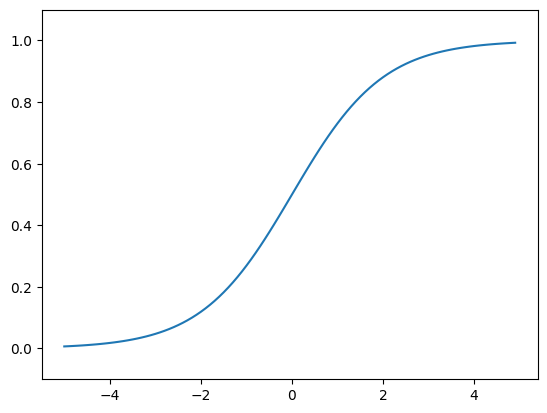

In [31]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

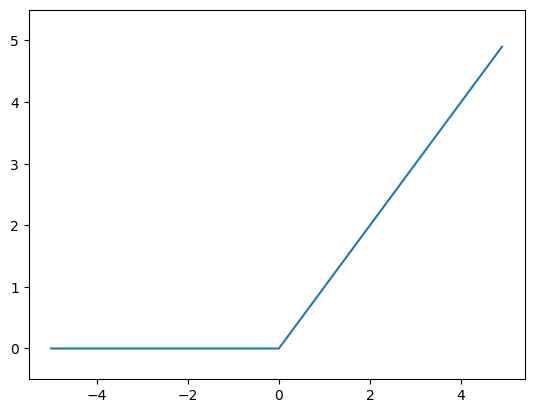

In [32]:
def relu(x):
    return np.maximum(0, x)  # max只接受一个参数，而maximum接受两个参数

x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.5, 5.5)
plt.show()


In [33]:
import numpy as np

A = np.array([1, 2, 3, 4])
(A, A.ndim, A.shape)

(array([1, 2, 3, 4]), 1, (4,))

In [34]:
B = np.array([[1,2], [3,4], [5,6]])
(B, B.ndim, B.shape)

(array([[1, 2],
        [3, 4],
        [5, 6]]),
 2,
 (3, 2))

In [35]:
# np.dot 点积(用于区分*运算或者np.multiply)
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

(np.dot(A, B), np.dot(B,A), np.multiply(A,B), np.multiply(B,A))

(array([[19, 22],
        [43, 50]]),
 array([[23, 34],
        [31, 46]]),
 array([[ 5, 12],
        [21, 32]]),
 array([[ 5, 12],
        [21, 32]]))

In [36]:
# 2维数组与一维数组点积

A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8])

np.dot(A, B)
# np.dot(B,A) 运行出错，放在后面可以看作列向量

array([23, 53, 83])

In [37]:
X = np.array([1,2])  # 放在前面可以看作行向量，可以认为每一行是一个数据集
W = np.array([[1,3,5], [2,4,6]])  # 权重矩阵，上下两个数据分别是x1和x2的神经元权重
Y = np.dot(X,W)  # np.dot会使得X的每一行与W的每一列（神经元权重）点积
Y

array([ 5, 11, 17])

In [38]:
# 3层神经网络
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
A1, Z1

(array([0.3, 0.7, 1.1]), array([0.57444252, 0.66818777, 0.75026011]))

In [39]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
A2, Z2

(array([0.51615984, 1.21402696]), array([0.62624937, 0.7710107 ]))

In [40]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Z3 = identity_function(A3)  # 激活函数输出等于输入，输出层的激活函数读作sigma
A3, Z3

(array([0.31682708, 0.69627909]), array([0.31682708, 0.69627909]))

In [41]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

In [42]:
# softmax激活函数
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
exp_a, sum_exp_a, exp_a / sum_exp_a

(array([ 1.34985881, 18.17414537, 54.59815003]),
 74.1221542101633,
 array([0.01821127, 0.24519181, 0.73659691]))

In [43]:
# 容易运算溢出的softmax
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

softmax(np.array([1010, 1000, 990]))

/var/folders/l9/pqmjq7fn7sl4whpry3f369yw0000gn/T/ipykernel_3191/809817158.py:3: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
/var/folders/l9/pqmjq7fn7sl4whpry3f369yw0000gn/T/ipykernel_3191/809817158.py:5: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


array([nan, nan, nan])

In [44]:
# 溢出避免的softmax，在输入中减去输入中的最大值
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

softmax(np.array([1010, 1000, 990]))  # 无溢出

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [45]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y, y.sum()

(array([0.01821127, 0.24519181, 0.73659691]), 1.0)

In [46]:
# 通过torchvision下载mnist数据集
import torchvision
train_data = torchvision.datasets.MNIST(
    root="../dataset", train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_data = torchvision.datasets.MNIST(
    root="../dataset", train=False, transform=torchvision.transforms.ToTensor(), download=True
)

len(train_data), len(test_data)
# 数据预处理，flatten
x_train = np.zeros((len(train_data), 28**2))
t_train = np.zeros((len(train_data)), dtype=np.int32)
for i in range(len(train_data)):
    x_train[i, :] = train_data[i][0].reshape(1,-1)
    t_train[i] = train_data[i][1]

x_test = np.zeros((len(test_data), 28**2))
t_test = np.zeros((len(test_data)), dtype=np.int32)
for i in range(len(test_data)):
    x_test[i, :] = test_data[i][0].reshape(1,-1)
    t_test[i] = test_data[i][1]

x_train.shape, t_train.shape, x_test.shape, t_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

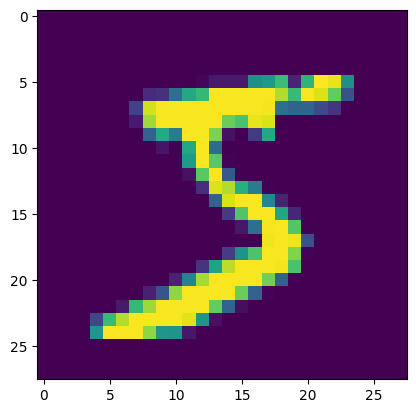

(5, 1.0)

In [47]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0].reshape(28,28))
plt.show()
t_train[0], np.max(x_train[0])

In [48]:
import pickle

def get_data():
    train_data = torchvision.datasets.MNIST(
        root="../dataset", train=True, transform=torchvision.transforms.ToTensor(), download=True
    )
    test_data = torchvision.datasets.MNIST(
        root="../dataset", train=False, transform=torchvision.transforms.ToTensor(), download=True
    )
    # 数据预处理，flatten
    x_train = np.zeros((len(train_data), 28**2))
    t_train = np.zeros((len(train_data)), dtype=np.int32)
    for i in range(len(train_data)):
        x_train[i, :] = train_data[i][0].reshape(1,-1)
        t_train[i] = train_data[i][1]

    x_test = np.zeros((len(test_data), 28**2))
    t_test = np.zeros((len(test_data)), dtype=np.int32)
    for i in range(len(test_data)):
        x_test[i, :] = test_data[i][0].reshape(1,-1)
        t_test[i] = test_data[i][1]
    
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)  # 本质上是一个字典文件pkl
    
    return network

def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

init_network()

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [49]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # np.argmax 获取最大值的索引
    if p == t[i]:
        accuracy_cnt += 1

accuracy_cnt / len(x)

0.9352

In [50]:
# 批处理 batch概念
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i: i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)  # axis=1 代表操作沿着第1个纬度，即行,列,页中的列，所以对每一行进行取最大值的索引
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

accuracy_cnt / len(x)

0.9352